### HEPATITIS - LIVER DISEASE PREDICTION :

In [1]:
from numpy.random import seed
seed(1)
#from tensorflow import set_random_seed
#set_random_seed(2)
import tensorflow as tf
from tensorflow import keras
from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.python.data import Dataset
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
print(tf.__version__)

2.3.0


In [2]:
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss


In [152]:
dataset = pd.read_csv("hcvdat0.csv")
dataset

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [153]:
df = pd.DataFrame(dataset)
df

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [154]:
# Delete the Unnamed First Column which only has the Serial IDs :

df = dataset.iloc[:,1:]
df

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [155]:
df.shape


(615, 13)

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
Category    615 non-null object
Age         615 non-null int64
Sex         615 non-null object
ALB         614 non-null float64
ALP         597 non-null float64
ALT         614 non-null float64
AST         615 non-null float64
BIL         615 non-null float64
CHE         615 non-null float64
CHOL        605 non-null float64
CREA        615 non-null float64
GGT         615 non-null float64
PROT        614 non-null float64
dtypes: float64(10), int64(1), object(2)
memory usage: 62.6+ KB


In [157]:
df.columns

Index(['Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE',
       'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')

In [158]:
df['Category'].value_counts() 

0=Blood Donor             533
3=Cirrhosis                30
1=Hepatitis                24
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: Category, dtype: int64

In [159]:
print(df["Category"].isnull().sum())

0


In [160]:
print(df.isnull().sum())

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64


In [161]:
# Removing NULL values :

# 1.
ALB_Median = df['ALB'].median()

df['ALB'] = df.ALB.fillna(value = ALB_Median)
df['ALB']

0      38.5
1      38.5
2      46.9
3      43.2
4      39.2
       ... 
610    32.0
611    24.0
612    29.0
613    33.0
614    36.0
Name: ALB, Length: 615, dtype: float64

In [162]:
# 2. 

ALT_Median = df['ALT'].median()
df['ALT'] = df.ALB.fillna(value = ALT_Median )

In [163]:
# 3. 

ALP_Median = df['ALP'].median()
df['ALP'] = df.ALB.fillna(value = ALP_Median)

In [164]:
# 4. 

CHOL_Median = df['CHOL'].median()
df['CHOL'] = df.ALB.fillna(value = CHOL_Median)

In [165]:
# 5. 

PROT_Median = df['PROT'].median()
df['PROT'] = df.ALB.fillna(value = PROT_Median)

In [166]:
print(df.isnull().sum())

Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64


In [167]:
df['Category']

0      0=Blood Donor
1      0=Blood Donor
2      0=Blood Donor
3      0=Blood Donor
4      0=Blood Donor
           ...      
610      3=Cirrhosis
611      3=Cirrhosis
612      3=Cirrhosis
613      3=Cirrhosis
614      3=Cirrhosis
Name: Category, Length: 615, dtype: object

In [168]:
# ONE HOT ENCODING FOR THE GENDER COLUMN : SEX

In [169]:
one_hot = pd.get_dummies(df, columns = ['Sex'])

In [170]:
df =one_hot
df

,Category,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Sex_f,Sex_m
0,0=Blood Donor,32,38.5,38.5,38.5,22.1,7.5,6.93,38.5,106.0,12.1,38.5,0,1
1,0=Blood Donor,32,38.5,38.5,38.5,24.7,3.9,11.17,38.5,74.0,15.6,38.5,0,1
2,0=Blood Donor,32,46.9,46.9,46.9,52.6,6.1,8.84,46.9,86.0,33.2,46.9,0,1
3,0=Blood Donor,32,43.2,43.2,43.2,22.6,18.9,7.33,43.2,80.0,33.8,43.2,0,1
4,0=Blood Donor,32,39.2,39.2,39.2,24.8,9.6,9.15,39.2,76.0,29.9,39.2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,3=Cirrhosis,62,32.0,32.0,32.0,110.3,50.0,5.57,32.0,55.7,650.9,32.0,1,0
611,3=Cirrhosis,64,24.0,24.0,24.0,44.4,20.0,1.54,24.0,63.0,35.9,24.0,1,0
612,3=Cirrhosis,64,29.0,29.0,29.0,99.0,48.0,1.66,29.0,66.7,64.2,29.0,1,0
613,3=Cirrhosis,46,33.0,33.0,33.0,62.0,20.0,3.56,33.0,52.0,50.0,33.0,1,0


In [171]:
# CONVERTING THE CATEGORICAL COLUMN "Category" INTO NUMERICAL VALUES USING LABEL_ENCODER :

label_encoder = preprocessing.LabelEncoder() 

df['Category']= label_encoder.fit_transform(df['Category'])
df

,Category,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Sex_f,Sex_m
0,0,32,38.5,38.5,38.5,22.1,7.5,6.93,38.5,106.0,12.1,38.5,0,1
1,0,32,38.5,38.5,38.5,24.7,3.9,11.17,38.5,74.0,15.6,38.5,0,1
2,0,32,46.9,46.9,46.9,52.6,6.1,8.84,46.9,86.0,33.2,46.9,0,1
3,0,32,43.2,43.2,43.2,22.6,18.9,7.33,43.2,80.0,33.8,43.2,0,1
4,0,32,39.2,39.2,39.2,24.8,9.6,9.15,39.2,76.0,29.9,39.2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,4,62,32.0,32.0,32.0,110.3,50.0,5.57,32.0,55.7,650.9,32.0,1,0
611,4,64,24.0,24.0,24.0,44.4,20.0,1.54,24.0,63.0,35.9,24.0,1,0
612,4,64,29.0,29.0,29.0,99.0,48.0,1.66,29.0,66.7,64.2,29.0,1,0
613,4,46,33.0,33.0,33.0,62.0,20.0,3.56,33.0,52.0,50.0,33.0,1,0


In [172]:
df['Category'].value_counts()

# Here :
# 0 => BLOOD DONOR (533 records)
# 4 => CIRRHOSIS (30 records)
# 2 => HEPATITIS (24 records)
# 3 => FIBROSIS (21 records)
# 1 => SUSPECT BLOOD DONOR(7 records)

0    533
4     30
2     24
3     21
1      7
Name: Category, dtype: int64

In [173]:
df.head()

,Category,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Sex_f,Sex_m
0,0,32,38.5,38.5,38.5,22.1,7.5,6.93,38.5,106.0,12.1,38.5,0,1
1,0,32,38.5,38.5,38.5,24.7,3.9,11.17,38.5,74.0,15.6,38.5,0,1
2,0,32,46.9,46.9,46.9,52.6,6.1,8.84,46.9,86.0,33.2,46.9,0,1
3,0,32,43.2,43.2,43.2,22.6,18.9,7.33,43.2,80.0,33.8,43.2,0,1
4,0,32,39.2,39.2,39.2,24.8,9.6,9.15,39.2,76.0,29.9,39.2,0,1


In [174]:
predictors = df.iloc[:,1:]
predictors
X = predictors
X

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Sex_f,Sex_m
0,32,38.5,38.5,38.5,22.1,7.5,6.93,38.5,106.0,12.1,38.5,0,1
1,32,38.5,38.5,38.5,24.7,3.9,11.17,38.5,74.0,15.6,38.5,0,1
2,32,46.9,46.9,46.9,52.6,6.1,8.84,46.9,86.0,33.2,46.9,0,1
3,32,43.2,43.2,43.2,22.6,18.9,7.33,43.2,80.0,33.8,43.2,0,1
4,32,39.2,39.2,39.2,24.8,9.6,9.15,39.2,76.0,29.9,39.2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,62,32.0,32.0,32.0,110.3,50.0,5.57,32.0,55.7,650.9,32.0,1,0
611,64,24.0,24.0,24.0,44.4,20.0,1.54,24.0,63.0,35.9,24.0,1,0
612,64,29.0,29.0,29.0,99.0,48.0,1.66,29.0,66.7,64.2,29.0,1,0
613,46,33.0,33.0,33.0,62.0,20.0,3.56,33.0,52.0,50.0,33.0,1,0


In [175]:
predictant = df.iloc[:,0]
predictant
y = predictant
y

0      0
1      0
2      0
3      0
4      0
      ..
610    4
611    4
612    4
613    4
614    4
Name: Category, Length: 615, dtype: int32

In [176]:
# SCALING THE DATA (Only for Predictors(X-axis variables)) :

scaler = preprocessing.MinMaxScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), columns=X.columns)
X

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Sex_f,Sex_m
0,0.224138,0.350669,0.350669,0.350669,0.036694,0.026461,0.367578,0.350669,0.091495,0.011757,0.350669,0.0,1.0
1,0.224138,0.350669,0.350669,0.350669,0.044990,0.012243,0.650434,0.350669,0.061619,0.017172,0.350669,0.0,1.0
2,0.224138,0.475483,0.475483,0.475483,0.134014,0.020932,0.494997,0.475483,0.072822,0.044400,0.475483,0.0,1.0
3,0.224138,0.420505,0.420505,0.420505,0.038290,0.071485,0.394263,0.420505,0.067221,0.045328,0.420505,0.0,1.0
4,0.224138,0.361070,0.361070,0.361070,0.045310,0.034755,0.515677,0.361070,0.063486,0.039295,0.361070,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,0.741379,0.254086,0.254086,0.254086,0.318124,0.194313,0.276851,0.254086,0.044534,1.000000,0.254086,1.0,0.0
611,0.775862,0.135215,0.135215,0.135215,0.107849,0.075829,0.008005,0.135215,0.051349,0.048577,0.135215,1.0,0.0
612,0.775862,0.209510,0.209510,0.209510,0.282068,0.186414,0.016011,0.209510,0.054803,0.092358,0.209510,1.0,0.0
613,0.465517,0.268945,0.268945,0.268945,0.164008,0.075829,0.142762,0.268945,0.041079,0.070390,0.268945,1.0,0.0


In [177]:
X.shape


(615, 13)

In [178]:
# DATA SHUFFLING :

X = X.reindex(np.random.permutation(X.index))
X.head(10)

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Sex_f,Sex_m
36,0.275862,0.395245,0.395245,0.395245,0.063178,0.019352,0.533022,0.395245,0.068154,0.027382,0.395245,0.0,1.0
1,0.224138,0.350669,0.350669,0.350669,0.044990,0.012243,0.650434,0.350669,0.061619,0.017172,0.350669,0.0,1.0
68,0.310345,0.468053,0.468053,0.468053,0.045629,0.031201,0.480987,0.468053,0.072822,0.029084,0.468053,0.0,1.0
133,0.431034,0.432392,0.432392,0.432392,0.066050,0.013033,0.591061,0.432392,0.090561,0.045947,0.432392,0.0,1.0
174,0.500000,0.410104,0.410104,0.410104,0.056477,0.059242,0.700467,0.410104,0.072822,0.059406,0.410104,0.0,1.0
431,0.500000,0.367013,0.367013,0.367013,0.092214,0.007899,0.492328,0.367013,0.064420,0.030322,0.367013,1.0,0.0
573,0.655172,0.476969,0.476969,0.476969,0.144544,0.044234,0.345564,0.476969,0.058725,0.100712,0.476969,0.0,1.0
319,0.224138,0.482912,0.482912,0.482912,0.020740,0.015008,0.585057,0.482912,0.051349,0.028620,0.482912,1.0,0.0
382,0.413793,0.358098,0.358098,0.358098,0.026165,0.010664,0.759173,0.358098,0.046681,0.028156,0.358098,1.0,0.0
443,0.517241,0.297177,0.297177,0.297177,0.028079,0.024882,0.258839,0.297177,0.070021,0.005260,0.297177,1.0,0.0



#### The Dataset is hugely imbalanced with majority class being class 0.
#### All other 4 classes are minority classes.
#### Resolution needed ->  SMOTE technique with sampling strategy to include individual weights for each class.

# SMOTE :
strategy = {0:540, 1:10, 2:540, 3:540, 4:540}
oversample = SMOTE(sampling_strategy=strategy, random_state = 1)
X, y = oversample.fit_resample(X, y)


In [202]:
X

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Sex_f,Sex_m
0,0.275862,0.395245,0.395245,0.395245,0.063178,0.019352,0.533022,0.395245,0.068154,0.027382,0.395245,0.0,1.0
1,0.224138,0.350669,0.350669,0.350669,0.044990,0.012243,0.650434,0.350669,0.061619,0.017172,0.350669,0.0,1.0
2,0.310345,0.468053,0.468053,0.468053,0.045629,0.031201,0.480987,0.468053,0.072822,0.029084,0.468053,0.0,1.0
3,0.431034,0.432392,0.432392,0.432392,0.066050,0.013033,0.591061,0.432392,0.090561,0.045947,0.432392,0.0,1.0
4,0.500000,0.410104,0.410104,0.410104,0.056477,0.059242,0.700467,0.410104,0.072822,0.059406,0.410104,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2165,0.327848,0.436405,0.436405,0.436405,0.109244,0.056475,0.446518,0.436405,0.060917,0.133076,0.436405,0.0,1.0
2166,0.451581,0.419639,0.419639,0.419639,0.046639,0.032978,0.593151,0.419639,0.071391,0.115636,0.419639,1.0,0.0
2167,0.461513,0.479561,0.479561,0.479561,0.042962,0.019326,0.605450,0.479561,0.067088,0.054942,0.479561,1.0,0.0
2168,0.380983,0.436994,0.436994,0.436994,0.048881,0.042717,0.530634,0.436994,0.080562,0.026394,0.436994,0.0,1.0


In [204]:
from sklearn.model_selection import train_test_split

train_X, validation_X, train_y, validation_y = train_test_split(X,y, test_size=0.2, random_state=10)

#Shape of Training Data :
print(train_X.shape)
print(train_y.shape)

print(validation_X.shape)
print(validation_y.shape)

(1736, 13)
(1736,)
(434, 13)
(434,)


In [205]:
train_y.value_counts()

3    446
2    433
0    429
4    420
1      8
Name: Category, dtype: int64

In [206]:
validation_y.value_counts()

4    120
0    111
2    107
3     94
1      2
Name: Category, dtype: int64

In [207]:
#Shape of Training Data :
print(train_X.shape)
print(train_y.shape)

print(validation_X.shape)
print(validation_y.shape)

(1736, 13)
(1736,)
(434, 13)
(434,)


In [183]:
# Checking the distribution of classes in the Training Dataset :

print(train_y)

345    0
6      0
217    0
194    0
175    0
      ..
369    0
320    0
527    0
125    0
265    0
Name: Category, Length: 492, dtype: int32


In [208]:
# Checking the distribution of classes in the Validation Dataset :

print(validation_y.to_numpy())

[4 0 0 2 2 0 2 4 3 2 2 0 3 2 3 2 4 4 0 0 4 4 0 3 0 4 1 2 3 2 2 3 0 3 3 4 4
 0 0 0 4 4 4 3 4 4 3 0 3 4 3 4 3 4 4 4 3 4 4 3 0 2 0 3 3 0 0 4 0 2 4 2 0 4
 0 3 2 3 4 2 4 0 0 0 3 0 0 0 0 4 2 4 2 2 3 0 0 2 3 2 4 4 4 0 0 0 2 3 3 2 3
 2 2 0 3 0 4 1 4 3 2 3 3 4 0 2 0 0 2 2 4 3 4 3 0 4 2 0 2 3 0 4 2 4 4 3 3 2
 2 0 2 3 3 4 3 2 2 2 4 0 4 4 3 3 2 0 3 2 4 0 2 2 3 0 0 3 4 3 0 4 2 4 4 4 4
 3 4 4 0 4 4 2 0 0 2 3 2 4 2 3 0 2 3 2 2 2 4 2 3 2 0 4 0 2 0 0 0 3 3 0 0 4
 4 2 0 0 4 4 0 4 2 0 4 2 2 2 3 4 4 0 4 0 2 4 3 3 3 0 2 3 3 2 2 0 0 3 2 4 3
 3 0 2 3 3 0 0 3 4 4 2 3 4 0 3 2 2 4 0 3 3 4 4 4 3 4 4 4 4 4 0 0 4 3 3 3 3
 4 3 2 2 0 4 2 4 2 4 4 0 2 2 2 0 2 3 4 2 4 2 0 2 4 3 2 3 2 0 4 2 4 2 2 4 4
 2 3 4 0 0 2 4 3 4 0 2 3 2 0 4 0 4 2 4 4 0 2 4 3 3 4 3 4 0 3 3 2 0 0 0 0 0
 0 4 2 4 3 0 0 0 3 3 4 3 4 4 4 4 2 2 2 2 0 4 2 4 0 3 4 0 2 2 3 2 2 4 0 2 0
 0 3 0 3 3 0 0 2 4 4 2 2 2 4 0 0 0 0 0 0 3 2 3 0 2 4 4]


#### Observation : The Validation data now has a distribution of classes 2,3 & 4. However class-1 is missing in this dataset.

##### NAIVE MODEL : Applying the Naive method of getting the average to determine the accuracy of the Model :

In [209]:

Model_naive = max(pd.value_counts(df.Category)*100/len(df.Category))
Model_naive

86.66666666666667

In [210]:
#Shape of Training Data :
print(train_X.shape)
print(train_y.shape)

print(validation_X.shape)
print(validation_y.shape)

(1736, 13)
(1736,)
(434, 13)
(434,)


#### Defining the Keras model :

##### Problem Type : Multi Classification of Target column values

##### 1. Activation Function to be used in the Output Layer : Softmax 
##### 2. Loss Function to be used : sparse_categorical_crossentropy 
##### 3. Metrics to be analyzed : Accuracy is chosen in order to analyse the Accuracy of Model Prediction. 
##### 4. Number of Hidden Layers : 1

#### KERAS MODEL :


In [215]:
# Regularized Model 1 :

model1 = keras.Sequential([
    keras.layers.Dense(32, kernel_regularizer=keras.regularizers.l1(0.1), activation=tf.nn.relu,
                       input_shape=(train_X.shape[1],)),
    keras.layers.Dense(32, use_bias=True, kernel_regularizer=keras.regularizers.l1(0.01), activation=tf.nn.relu),
    keras.layers.Dense(5, activation='softmax')
  ])

model1.compile(loss='sparse_categorical_crossentropy',
                optimizer="adam",
                metrics=['accuracy'])

In [216]:
# compile the keras model

model1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [219]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 200
model1_train = model1.fit(train_X, train_y, epochs=EPOCHS,
                    validation_data= (validation_X, validation_y), verbose=0, batch_size = 300,
                    callbacks=[PrintDot()])



....................................................................................................
....................................................................................................

In [220]:
model1_train.history.keys()

#Accuracy of the model 1 :
print(max(model1_train.history['accuracy']))
print(max(model1_train.history['val_accuracy']))

0.2569124400615692
0.21658986806869507


In [221]:
model1.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 32)                448       
_________________________________________________________________
dense_19 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_20 (Dense)             (None, 5)                 165       
Total params: 1,669
Trainable params: 1,669
Non-trainable params: 0
_________________________________________________________________


In [224]:
# SAMPLE PREDICTIONS ON VALIDATION DATA :

# VALIDATION DATA PREDICTION BY MODEL :
pred_val = model1.predict(validation_X)[:10] 
pred_val = np.argmax(pred_val, axis = 1)
print("VALIDATION DATA PREDICTED BY THE MODEL : \n", pred_val) 


# ACTUAL VALIDATION DATA :
y_array = validation_y.to_numpy()[:10]
print("ACTUAL VALIDATION DATA : \n", y_array)


VALIDATION DATA PREDICTED BY THE MODEL : 
 [3 3 3 3 3 3 3 3 3 3]
ACTUAL VALIDATION DATA : 
 [4 0 0 2 2 0 2 4 3 2]


In [223]:
# DISPLAY OF DISEASE PROGRESSION :

stages = {0 : 'Blood Donor', 1 : 'Suspect Blood Donor', 2 : 'Hepatitis : First Stage of Liver disease', 3 : 'Fibrosis : Second Stage of Liver disease', 4 : 'Cirrhosis : Last Stage of Liver disease'}

In [194]:
for i in pred_val[-20:]:
    print(i , '=>',stages[i])

0 => Blood Donor
0 => Blood Donor
0 => Blood Donor
0 => Blood Donor
0 => Blood Donor
0 => Blood Donor
0 => Blood Donor
0 => Blood Donor
0 => Blood Donor
0 => Blood Donor
0 => Blood Donor
0 => Blood Donor
0 => Blood Donor
0 => Blood Donor
0 => Blood Donor
0 => Blood Donor
0 => Blood Donor
0 => Blood Donor
0 => Blood Donor
0 => Blood Donor


#### PLOT FOR MODEL 1 :


In [195]:
x = model1.fit(train_X, train_y, epochs=400,
             validation_data= (validation_X, validation_y), verbose=0)

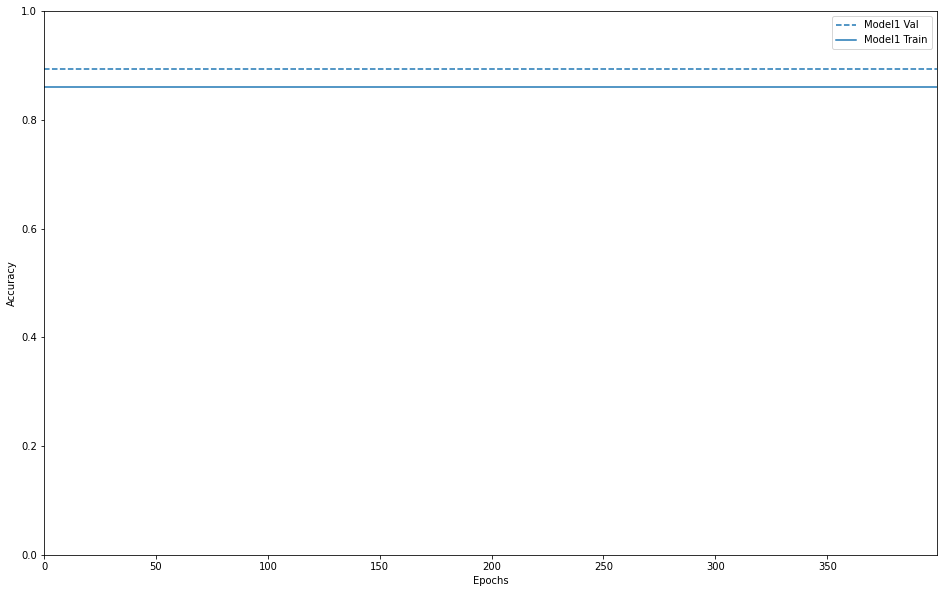

In [196]:
import matplotlib.pyplot as plt


def plot_history(histories, key='accuracy'):
  plt.figure(figsize=(16,10))
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])
  plt.ylim([0,1])

plot_history([('model1', x)])

In [ ]:
y_predicted = (model.predict(validation_X > 0.5).astype("int32"))

In [74]:
# performance

from sklearn import metrics


print("Classification report for %s" % model1)

print(metrics.classification_report(validation_y, pred_val))

print("Confusion matrix")
print(metrics.confusion_matrix(validation_y, pred_val))

Classification report for <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000021F5F340F48>
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       110
           2       0.25      0.50      0.33         2
           3       0.00      0.00      0.00         5
           4       0.67      0.33      0.44         6

    accuracy                           0.90       123
   macro avg       0.47      0.45      0.44       123
weighted avg       0.88      0.90      0.89       123

Confusion matrix
[[108   1   1   0]
 [  1   1   0   0]
 [  4   0   0   1]
 [  1   2   1   2]]


In [76]:
df['Category'].value_counts()

0    533
4     30
2     24
3     21
1      7
Name: Category, dtype: int64

##### OBSERVATIONS FROM THIS MODEL :

1. The Modelis not training well as indicated by the straight linear line. There are very few fluctuations in between, which indicates some learning.
2. We will apply Regularizations in the below sections and check for the results.
3. Even after having applied the SMOTE technique to resolve the IMBALANCED DATA ISSUE, 
    the VALIDATION DATA SET did not include the Class (=1) and hence wasn't trained for this particular class.
4. The Precision values are high only for classes = 0 and 4. The other 3 classes have poor Precison/Recall values.


#### 2.   Compare at least one of the models from above with respect to the following hyper-parameters.
#### a.   1 Hidden Layer vs 2 Hidden Layers

#####                                                                  
                                                                
                                                                                    
                                                                                    





#### Defining the Keras model :

##### Problem Type : Multi Classification of Target column values

##### 1. Activation Function to be used in the Output Layer : Softmax 
##### 2. Loss Function to be used : sparse_categorical_crossentropy 
##### 3. Metrics to be analyzed : Accuracy is chosen in order to analyse the Accuracy of Model Prediction. 
##### 4. Number of Hidden Layers : 2

In [142]:
# KERAS MODEL :

from keras.models import Sequential
from keras.layers import Dense

model2 = Sequential()
model2.add(Dense(32, input_dim=13, input_shape=(train_X.shape[1],), activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(5, activation='softmax'))

In [143]:
# compile the new keras model

model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [144]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 300
model2_train = model2.fit(train_X, train_y, epochs=EPOCHS,
                    validation_data= (validation_X, validation_y), verbose=0, batch_size = 10,
                    callbacks=[PrintDot()])



....................................................................................................
....................................................................................................
....................................................................................................

In [145]:
model2_train.history.keys()

#Accuracy of the model 2 :
print(max(model2_train.history['val_accuracy']))


0.8780487775802612


In [148]:
model2.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 32)                448       
_________________________________________________________________
dense_11 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_12 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_13 (Dense)             (None, 5)                 165       
Total params: 2,725
Trainable params: 2,725
Non-trainable params: 0
_________________________________________________________________


In [159]:
# SAMPLE PREDICTIONS (FIRST 15 RECORDS):

# VALIDATION DATA PREDICTION BY MODEL :
pred_val = model2.predict(validation_X[:15]) 
pred_val = np.argmax(pred_val, axis = 1)
print("VALIDATION DATA PREDICTED BY THE MODEL : \n", pred_val) 


# ACTUAL VALIDATION DATA :
y_array = validation_y.to_numpy()
print("ACTUAL VALIDATION DATA : \n", y_array[:15])


VALIDATION DATA PREDICTED BY THE MODEL : 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
ACTUAL VALIDATION DATA : 
 [0 0 0 0 0 0 0 3 0 0 0 0 0 0 0]


#### PLOT FOR MODEL 2 :


In [160]:
x = model2.fit(train_X, train_y, epochs=300,
             validation_data= (validation_X, validation_y), verbose=0)

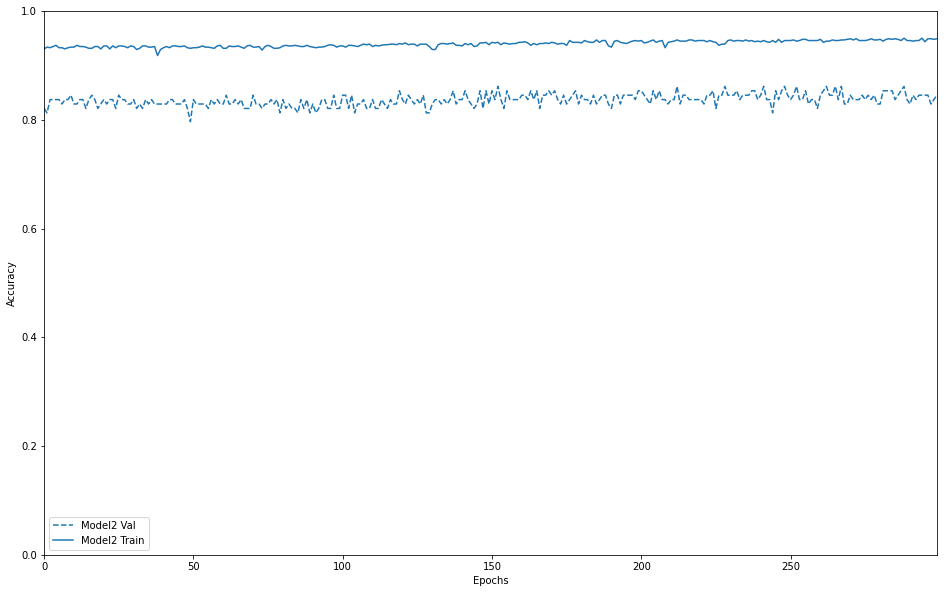

In [161]:
import matplotlib.pyplot as plt


def plot_history(histories, key='accuracy'):
  plt.figure(figsize=(16,10))
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])
  plt.ylim([0,1])

plot_history([('model2', x)])

##### OBSERVATIONS FROM THIS MODEL :

1. After having added an extra layer to the Hidden region, we notice sligtly more learning in the model.
However, the curvature of the graph indicates that the data imbalance still persists even after having used the Smote technique, suggesting that this may not be the most ideal way of improving the data imbalance.

2. There seems to be a Generalization error between the Training and Validation data.
3. We will apply Regularizations in the below upcoming sections and check for the results.
4. Even though the accuracy may have reduced compared to the previous model, but this Model 
    seems to be training/learning better as depicted by the up/down curves w.r.t increasing epochs.



#### 2b.  Compare at least one of the models from above with respect to the following hyper-parameters.

####  No of neurons in hidden layers between (a)2/3 the size of the input layer, plus the size of the output layer, and (b) twice the size of the input layer


#####                                                                  
                                                                
                                                                                    
                                                                                    





#### Defining the Keras model for Model3 :

##### Problem Type : Multi Classification of Target column values

##### 1. Activation Function to be used in the Output Layer : Softmax 
##### 2. Loss Function to be used : sparse_categorical_crossentropy 
##### 3. Metrics to be analyzed : Accuracy is chosen in order to analyse the Accuracy of Model Prediction. 
##### 4. (a)  Number of Hidden Layers : 2 
##### 5. Number of Neurons in the Hidden layers : 2/3 the size of the input layer, plus the size of the output layer 
#####    Hidden Layers => 2/3(12) + 5 => 13 layers


In [162]:
# KERAS MODEL :

from keras.models import Sequential
from keras.layers import Dense

model3 = Sequential()
model3.add(Dense(32, input_dim=13, input_shape=(train_X.shape[1],), activation='relu'))
model3.add(Dense(13, activation='relu'))
model3.add(Dense(5, activation='softmax'))

In [163]:
# compile the keras model

model3.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [165]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 300
model3_train = model3.fit(train_X, train_y, epochs=EPOCHS,
                    validation_data= (validation_X, validation_y), verbose=0, batch_size = 10,
                    callbacks=[PrintDot()])



....................................................................................................
....................................................................................................
....................................................................................................

In [166]:
model3_train.history.keys()

#Accuracy of the model 1 :
print(max(model3_train.history['val_accuracy']))
print(max(model3_train.history['accuracy']))


0.8780487775802612
0.9229074716567993


In [167]:
model3.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 32)                448       
_________________________________________________________________
dense_15 (Dense)             (None, 13)                429       
_________________________________________________________________
dense_16 (Dense)             (None, 5)                 70        
Total params: 947
Trainable params: 947
Non-trainable params: 0
_________________________________________________________________


In [169]:
# TRAINING DATA PREDICTION BY MODEL :

pred_train = model3.predict(train_X) 
pred_train = np.argmax(pred_train, axis = 1)[:20] 

print(pred_train) 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]


In [171]:
# SAMPLE PREDICTIONS FOR LAST 20 RECORDS:

# VALIDATION DATA PREDICTION BY MODEL :
pred_val = model3.predict(validation_X) 
pred_val = np.argmax(pred_val, axis = 1)[-20:] 
print("VALIDATION DATA PREDICTED BY THE MODEL : \n", pred_val) 


# ACTUAL VALIDATION DATA :
y_array = validation_y.to_numpy()
#y_array
print("ACTUAL VALIDATION DATA : \n", y_array[-20:])


VALIDATION DATA PREDICTED BY THE MODEL : 
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
ACTUAL VALIDATION DATA : 
 [0 0 0 0 0 0 2 0 0 4 0 0 0 0 0 0 0 0 0 0]


#### PLOT FOR MODEL 3 :


In [172]:
x = model3.fit(train_X, train_y, epochs=300,
             validation_data= (validation_X, validation_y), verbose=0)

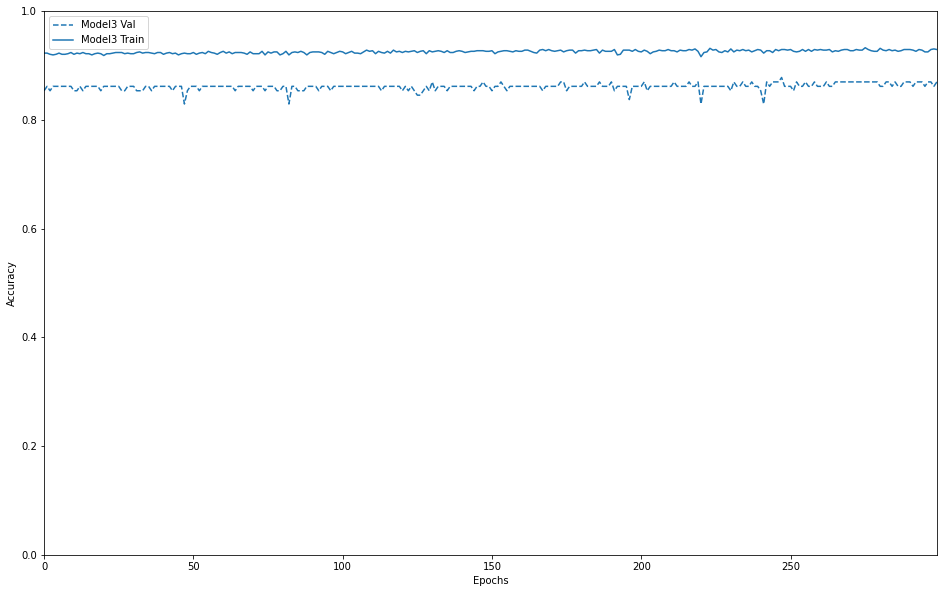

In [173]:
import matplotlib.pyplot as plt


def plot_history(histories, key='accuracy'):
  plt.figure(figsize=(16,10))
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])
  plt.ylim([0,1])

plot_history([('model3', x)])

##### OBSERVATIONS FROM THIS MODEL :

1. Here we have varied the number of neurons in the hidden layer to 2/3 the size of the input layer, plus the size of the output layer 
    Hidden Layers => 2/3(12) + 5 => 13 layers
2. The Generalization error between the Training and Validation data persists. Model is not learning upto the mark.
3. We will apply Regularizations in the below upcoming sections and check for the results.
4. The model predictions on Validation data are not upto the mark(Precision is not good in this case, 
   though it has an accuracy of 87% )

5. When all pre-processing and balance of datasets are taken care of, this number of neurons should work well in improving the model performance.





#### 2.  Compare at least one of the models from above with respect to the following hyper-parameters.

#### (b) No of neurons in hidden layers twice the size of the input layer


#####                                                                  
                                                                
                                                                                    
                                                                                    





#### Defining the Keras model for Model4 :

##### Problem Type : Multi Classification of Target column values

##### 1. Activation Function to be used in the Output Layer : Softmax 
##### 2. Loss Function to be used : sparse_categorical_crossentropy 
##### 3. Metrics to be analyzed : Accuracy is chosen in order to analyse the Accuracy of Model Prediction. 
##### 4. (a)  Number of Hidden Layers : 2 
##### 5. Number of Neurons in the Hidden layers : twice the size of the input layer
#####    Hidden Layers => 2(13) => 26 layers


In [189]:
# KERAS MODEL :

from keras.models import Sequential
from keras.layers import Dense

model4 = Sequential()
model4.add(Dense(13, input_dim=13, input_shape=(train_X.shape[1],), activation='relu'))
model4.add(Dense(26, activation='relu'))
model4.add(Dense(5, activation='softmax'))

In [190]:
# compile the keras model

model4.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [191]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 300
model4_train = model4.fit(train_X, train_y, epochs=EPOCHS,
                    validation_data= (validation_X, validation_y), verbose=0, batch_size = 10,
                    callbacks=[PrintDot()])



....................................................................................................
....................................................................................................
....................................................................................................

In [192]:
model4_train.history.keys()

#Accuracy of the model 1 :
print(max(model4_train.history['val_accuracy']))
print(max(model4_train.history['accuracy']))


0.8780487775802612
0.9085903167724609


In [193]:
model4.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 13)                182       
_________________________________________________________________
dense_21 (Dense)             (None, 26)                364       
_________________________________________________________________
dense_22 (Dense)             (None, 5)                 135       
Total params: 681
Trainable params: 681
Non-trainable params: 0
_________________________________________________________________


In [242]:
# SAMPLE PREDICTIONS :

# VALIDATION DATA PREDICTION BY MODEL :
pred_val = model4.predict(validation_X) 
pred_val = np.argmax(pred_val, axis = 1)[:20] 
print("VALIDATION DATA PREDICTED BY THE MODEL : \n", pred_val) 


# ACTUAL VALIDATION DATA :
y_array = validation_y.to_numpy()
#y_array
print("ACTUAL VALIDATION DATA : \n", y_array[:20])


VALIDATION DATA PREDICTED BY THE MODEL : 
 [1 1 4 4 4 1 4 1 4 1 4 4 1 4 1 4 4 4 4 4]
ACTUAL VALIDATION DATA : 
 [4 0 0 2 2 0 2 4 3 2 2 0 3 2 3 2 4 4 0 0]


#### PLOT FOR MODEL 4 :


In [196]:
x = model4.fit(train_X, train_y, epochs=300,
             validation_data= (validation_X, validation_y), verbose=0)

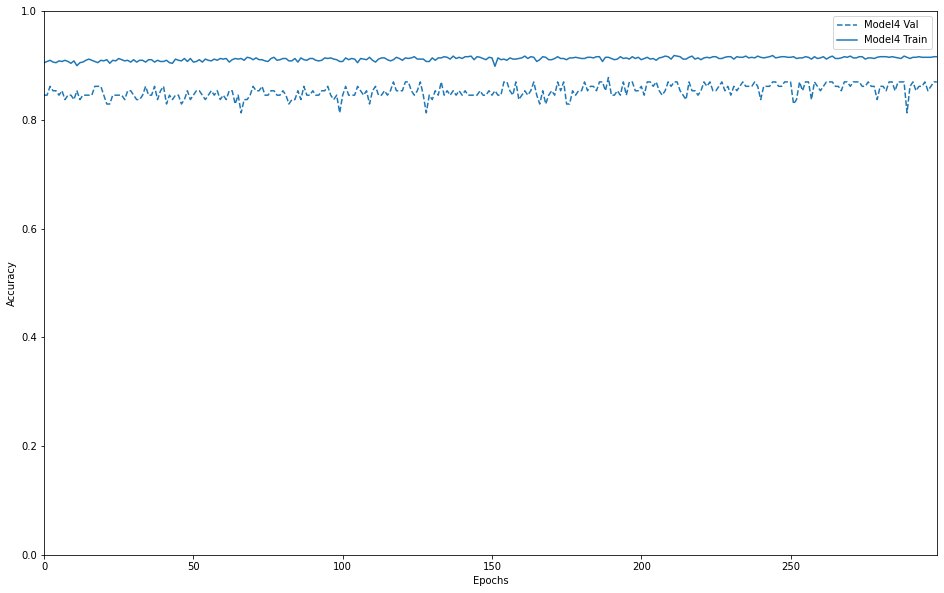

In [197]:
import matplotlib.pyplot as plt


def plot_history(histories, key='accuracy'):
  plt.figure(figsize=(16,10))
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])
  plt.ylim([0,1])

plot_history([('model4', x)])

##### OBSERVATIONS FROM THIS MODEL :

1. Here we have varied the number of neurons in the hidden layer to twice the size of the input layer 
 => 2(13) => 26 layers
2. There seems to be a case of the model leaning towards the classse 4 and 1, as the model is majorly predicting this class. This clearly suggests that more measures be taken in improving the overall balance of the dataset.
3. The model predictions on Validation data are not upto the mark(Precision is not good in this case, 
   though it has an accuracy of 87% )



